<a href="https://colab.research.google.com/github/Iron486/NLP_emotions_classifier/blob/main/Pretrained_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color='violet'>Import libraries</font>

In [ ]:

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import statistics
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras

!pip install transformers # install a library not present in Colab
! pip install text_hammer
import transformers
from transformers import BertTokenizer, TFBertForSequenceClassification

     |████████████████████████████████| 4.2 MB 24.3 MB/s 
     |████████████████████████████████| 596 kB 62.6 MB/s 
     |████████████████████████████████| 6.6 MB 59.7 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 115 kB 31.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


### <font color='violet'>Load the preprocessed GloVe embeddings</font>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''
import pickle
filename = 'drive/My Drive/Colab Notebooks/NLP_emotions_dataset/Untitled Folder 1/emotions_dataset/embeddings_index.sav'
embeddings_index = pickle.load(open(filename, 'rb'))'''

### <font color='violet'>Import datasets and preprocess the datasets</font>

In [ ]:

max_length = 58
f=open('drive/My Drive/Colab Notebooks/NLP_emotions_dataset/Untitled Folder 1/emotions_dataset/train.txt')
g=open('drive/My Drive/Colab Notebooks/NLP_emotions_dataset/Untitled Folder 1/emotions_dataset/val.txt')
h=open('drive/My Drive/Colab Notebooks/NLP_emotions_dataset/Untitled Folder 1/emotions_dataset/test.txt')


lb = LabelEncoder()
t = Tokenizer()
#def tokenizer_transform(words):
    #t.fit_on_texts(words)    
words_train =[]
labels=[]
for line in f:
    values =line.rsplit(";", maxsplit=1)
    sentence = values[0].split()
    label=values[1]#removesuffix('\n')
    word = sentence[:-1]
    words_train.append(word)
    labels.append(label)
f.close()  
'''
t.fit_on_texts(words_train)
encoded_docs_train = t.texts_to_sequences(words_train)
padded_docs_train = pad_sequences(encoded_docs_train, maxlen=max_length, padding='post')
'''

labels_train=lb.fit(labels)
labels_train=lb.transform(labels)

'''
vocab_size = len(t.word_index) + 1
embedding_matrix_train = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_train[i] = embedding_vector'''

def Preprocessing(file):
    words =[]
    labels=[]
    for line in file:
        values =line.rsplit(";", maxsplit=1)
        sentence = values[0].split()
        label=values[1]#.removesuffix('\n')
        word = sentence[:-1]
        words.append(word)
        labels.append(label)
    file.close()  

    labels=lb.transform(labels)
    # integer encode the documents
    '''
    encoded_docs = t.texts_to_sequences(words)
    #print(encoded_docs)
    # pad documents to a max length of8 words
    
    padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    
    embedding_matrix = zeros((vocab_size, 100))
    for word, i in t.word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector'''

    
    
    return words,labels

#padded_docs_train, encoded_docs_train,embedding_matrix_train,words_train,labels_train=Preprocessing(f,embeddings_index)
words_val,labels_val=Preprocessing(g)
words_test,labels_test=Preprocessing(h)

In [ ]:
from transformers import AutoTokenizer, TFBertModel
tokenizer=AutoTokenizer.from_pretrained('bert-base-cased')
bert=TFBertModel.from_pretrained('bert-base-cased')

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
from transformers import BertTokenizer, BertConfig, TFDistilBertModel,DistilBertTokenizer,DistilBertConfig

#dbert_model=TFDistilBertModel.from_pretrained('distil-bert-base-uncased')

#to save
#tokenizer.save_pretrained('bert-tokenizer')
#bert=TFBertModel.save_pretrained('bert-model')

In [ ]:
from tensorflow.keras.layers import Input, Dense
x_train = tokenizer(
    words_train,
    add_special_tokens=True,
    max_length=64,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    is_split_into_words=True,
    verbose = True)


x_val = tokenizer(
    words_val,
    add_special_tokens=True,
    max_length=64,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    is_split_into_words=True,
    verbose = True)

### <font color='violet'>Train the model</font>

In [ ]:
tf.random.set_seed(79)
max_len = 64
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


embeddings = bert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 is the pooler_output)
x = tf.keras.layers.GlobalMaxPool1D()(embeddings)
x = Dense(138, activation='elu',kernel_initializer='GlorotNormal')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = Dense(28,activation = 'elu',kernel_initializer='GlorotNormal')(x)

output = Dense(6,activation = 'softmax')(x)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=output)
model.layers[2].trainable = True
# for training bert our lr must be so small


opt = Adam(
    learning_rate=5e-05, # works well with BERTs
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
#model = tf.keras.models.Model( bert_model.input , outputs )
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())
# fit the model
early_stopping_cb=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
#bert_model.trainable = False

history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y =labels_train,
    validation_data = (
    {'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']}, labels_val
    ),
  epochs=7,
    batch_size=12,callbacks=[early_stopping_cb]
)

#history=model.fit(padded_docs_train, labels_train, epochs=70,validation_data=(padded_docs_val, labels_val),callbacks=[early_stopping_cb],batch_size=20)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 64)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 64)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 64,                                          

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']}, labels_val)
print('Accuracy: %f' % (accuracy*100))

63/63 [==============================] - 9s 145ms/step - loss: 0.4091 - accuracy: 0.8555
Accuracy: 85.549998


### <font color='violet'> History plot </font>

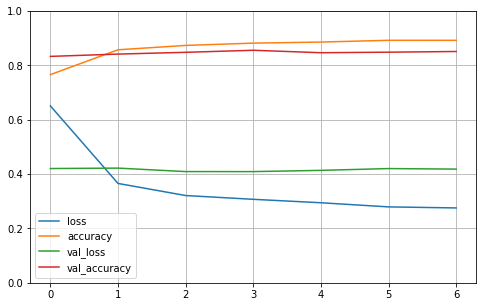

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_xlim(0,33)
plt.gca().set_ylim(0,1)
model.save_weights('model_BERT_weights.h5')

### <font color='violet'>Load the model</font>

In [ ]:
#to load the weights
'''tf.random.set_seed(79)
max_len = 64
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


embeddings = bert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 is the pooler_output)
x = tf.keras.layers.GlobalMaxPool1D()(embeddings)
x = Dense(138, activation='elu',kernel_initializer='GlorotNormal')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = Dense(28,activation = 'elu',kernel_initializer='GlorotNormal')(x)

output = Dense(6,activation = 'softmax')(x)
    
model_saved = tf.keras.Model(inputs=[input_ids, input_mask], outputs=output)
model_saved.layers[2].trainable = True


model_saved.load_weights('model_BERT_weights.h5')'''

### <font color='violet'>More details about the model</font>

In [ ]:

model_saved.summary()

#to visualize activation functions
for i, layer in enumerate (model_saved.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')
#specific info about each layer
for i in range(len(model_saved.layers)):
    print(f'{i}   {model_saved.layers[i]}: \n{model_saved.layers[i].get_config()} \n')
#info about optimizers
model_saved.optimizer.get_config()        

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 64)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 64)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 64,                                          

AttributeError: ignored